In [18]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

In [19]:
customers = pd.read_csv('olist_customers_dataset.csv')

In [20]:
orders = pd.read_csv('olist_orders_dataset.csv')

In [4]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [4]:
order_items = pd.read_csv('olist_order_items_dataset.csv')

In [6]:
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [7]:
order_items.query('order_id == "00143d0f86d6fbd9f9b38ab440ac16f5"')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
32,00143d0f86d6fbd9f9b38ab440ac16f5,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1


# Задача 1. Оценить месячный retention в оформление заказа с помощью когортного анализа.
### Посмотрю на метрики маркетплейса и на возвращаемость клиента в продукт.

In [8]:
orders.shape

(99441, 8)

In [9]:
orders.order_id.nunique()

99441

### Все заказы уникальны и, следовательно, у каждого заказа есть только один сохраненный статус, скорее всего это последний статус по заказу

### Среди существующих статусов заказов:
created — создан;
approved — подтверждён;
invoiced — выставлен счёт;
processing — в процессе сборки заказа;
shipped — отгружён со склада;
delivered — доставлен пользователю;
unavailable — заказ отменён по причине недоступности товара;;
canceled — отменён
### нас интересуют те, которые имеют или имели статус 'approved'.

### Виды заказов, которые будут учитываться в retention, - это те, у которых статусы "approved", "invoiced", "processing", "shipped", "delivered" (!= 'created', 'canceled', 'unavailable'), так как они точно прошли статус 'approved'

In [10]:
orders.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,f443ec3003e193944b796356e1d62f8f,520f054a1dae283f1d09b11e621c27b8,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2017-12-02 00:26:45,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


### поле "customer_id": unique = count
### То есть в таблице orders нет информации о настоящих id клиентов, нужно ее получить из таблицы customers

In [21]:
# Найдем соответствие customer_id с customer_unique_id для каждого заказа, чтобы идентифицировать пользователей
orders_ = orders.merge(customers, how='left', on='customer_id')
orders_.customer_unique_id.nunique()

96096

In [12]:
orders_

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


### Месячный retention (когортный анализ)

In [22]:
orders_['order_approved_at'] = pd.to_datetime(orders_['order_approved_at'])

In [23]:
orders_filtered = orders_.query('order_status != "unavailable" & order_status != "canceled" & order_status != "created"')

In [24]:
# Определим минимальную дату заказа у каждого пользователя
first_orders = orders_filtered \
                    .groupby('customer_unique_id') \
                    .agg({'order_approved_at': 'min'}) \
                    .reset_index() \
                    .rename(columns={'order_approved_at': 'min_order_date'})
first_orders

,customer_unique_id,min_order_date
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 11:11:18
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 18:25:44
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:49:17
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 20:06:52
...,...,...
94981,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:15:16
94982,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:16:20
94983,ffff371b4d645b6ecea244b27531430a,2017-02-07 16:02:44
94984,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:58:47


In [25]:
# Определим месячную когорту для каждого пользователя в формате "год-месяц"
first_orders['month_cohort'] = first_orders['min_order_date'].dt.strftime('%Y-%m')
first_orders

,customer_unique_id,min_order_date,month_cohort
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 11:11:18,2018-05
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 18:25:44,2018-05
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017-03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:49:17,2017-10
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 20:06:52,2017-11
...,...,...,...
94981,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:15:16,2017-06
94982,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:16:20,2017-12
94983,ffff371b4d645b6ecea244b27531430a,2017-02-07 16:02:44,2017-02
94984,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:58:47,2018-05


In [26]:
# Объединим таблицы orders и first orders для расчета retention
orders_with_first_orders = pd.merge(orders_filtered, first_orders, on='customer_unique_id', how='left')
orders_with_first_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,min_order_date,month_cohort
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-09-04 11:43:25,2017-09
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07-26 03:24:27,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08-08 08:55:23,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11-18 19:45:59,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2018-02-13 22:20:29,2018-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98197,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,2017-03-09 09:54:05,2017-03
98198,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,2018-02-06 13:10:37,2018-02
98199,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,2017-08-27 15:04:16,2017-08
98200,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2018-01-08 21:36:21,2018-01


In [27]:
# Определим, через сколько месяцев после оформления первого заказа клиенты оформляли следующие заказы
orders_with_first_orders['period_in_months'] = (orders_with_first_orders['order_approved_at'] - orders_with_first_orders['min_order_date']) // pd.to_timedelta(30, unit='days')
orders_with_first_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,min_order_date,month_cohort,period_in_months
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-09-04 11:43:25,2017-09,0.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07-26 03:24:27,2018-07,0.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08-08 08:55:23,2018-08,0.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11-18 19:45:59,2017-11,0.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2018-02-13 22:20:29,2018-02,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98197,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,2017-03-09 09:54:05,2017-03,0.0
98198,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,2018-02-06 13:10:37,2018-02,0.0
98199,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,2017-08-27 15:04:16,2017-08,0.0
98200,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2018-01-08 21:36:21,2018-01,0.0


In [28]:
# Таблица когортного анализа
cohort_table = orders_with_first_orders.groupby(['month_cohort', 'period_in_months'], as_index=False) \
                        .agg({'customer_unique_id': 'nunique'}) \
                        .rename(columns={'customer_unique_id': 'unique_customers'})
cohort_table

,month_cohort,period_in_months,unique_customers
0,2016-09,0.0,1
1,2016-10,0.0,291
2,2016-10,6.0,1
3,2016-10,9.0,1
4,2016-10,11.0,1
...,...,...,...
208,2018-06,1.0,21
209,2018-06,2.0,5
210,2018-07,0.0,5915
211,2018-07,1.0,7


In [29]:
cohort_table_pivoted = cohort_table.pivot(index='month_cohort', columns='period_in_months', values='unique_customers')
cohort_table_pivoted

period_in_months,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0
month_cohort,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,291.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,2.0
2016-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,716.0,2.0,NaN,4.0,1.0,1.0,2.0,2.0,NaN,NaN,4.0,4.0,3.0,2.0,NaN,2.0,2.0,2.0,1.0,NaN
2017-02,1674.0,3.0,3.0,6.0,4.0,2.0,4.0,1.0,1.0,4.0,1.0,6.0,1.0,3.0,2.0,1.0,2.0,4.0,NaN,NaN
2017-03,2580.0,7.0,12.0,11.0,3.0,2.0,8.0,5.0,8.0,5.0,6.0,4.0,5.0,3.0,6.0,3.0,3.0,3.0,NaN,NaN
2017-04,2301.0,8.0,6.0,NaN,7.0,8.0,6.0,10.0,6.0,4.0,2.0,4.0,NaN,2.0,2.0,2.0,2.0,NaN,NaN,NaN
2017-05,3543.0,16.0,15.0,13.0,13.0,12.0,12.0,4.0,11.0,9.0,8.0,10.0,7.0,4.0,8.0,5.0,NaN,NaN,NaN,NaN
2017-06,3110.0,13.0,14.0,10.0,5.0,15.0,8.0,6.0,4.0,10.0,9.0,8.0,2.0,8.0,3.0,NaN,NaN,NaN,NaN,NaN


In [30]:
# Размеры когорт
cohort_sizes = cohort_table_pivoted.iloc[:, 0]
cohort_sizes

month_cohort
2016-09       1.0
2016-10     291.0
2016-12       1.0
2017-01     716.0
2017-02    1674.0
2017-03    2580.0
2017-04    2301.0
2017-05    3543.0
2017-06    3110.0
2017-07    3776.0
2017-08    4154.0
2017-09    4097.0
2017-10    4360.0
2017-11    7053.0
2017-12    5591.0
2018-01    6878.0
2018-02    6335.0
2018-03    7009.0
2018-04    6542.0
2018-05    6774.0
2018-06    5916.0
2018-07    5915.0
2018-08    6356.0
Name: 0.0, dtype: float64

In [31]:
# Удержание
retention = cohort_table_pivoted.divide(cohort_sizes, axis=0)
retention

period_in_months,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0
month_cohort,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,1.0,NaN,NaN,NaN,NaN,NaN,0.003436,NaN,NaN,0.003436,NaN,0.003436,NaN,0.003436,NaN,0.003436,NaN,0.003436,0.006873,0.006873
2016-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,1.0,0.002793,NaN,0.005587,0.001397,0.001397,0.002793,0.002793,NaN,NaN,0.005587,0.005587,0.004190,0.002793,NaN,0.002793,0.002793,0.002793,0.001397,NaN
2017-02,1.0,0.001792,0.001792,0.003584,0.002389,0.001195,0.002389,0.000597,0.000597,0.002389,0.000597,0.003584,0.000597,0.001792,0.001195,0.000597,0.001195,0.002389,NaN,NaN
2017-03,1.0,0.002713,0.004651,0.004264,0.001163,0.000775,0.003101,0.001938,0.003101,0.001938,0.002326,0.001550,0.001938,0.001163,0.002326,0.001163,0.001163,0.001163,NaN,NaN
2017-04,1.0,0.003477,0.002608,NaN,0.003042,0.003477,0.002608,0.004346,0.002608,0.001738,0.000869,0.001738,NaN,0.000869,0.000869,0.000869,0.000869,NaN,NaN,NaN
2017-05,1.0,0.004516,0.004234,0.003669,0.003669,0.003387,0.003387,0.001129,0.003105,0.002540,0.002258,0.002822,0.001976,0.001129,0.002258,0.001411,NaN,NaN,NaN,NaN
2017-06,1.0,0.004180,0.004502,0.003215,0.001608,0.004823,0.002572,0.001929,0.001286,0.003215,0.002894,0.002572,0.000643,0.002572,0.000965,NaN,NaN,NaN,NaN,NaN


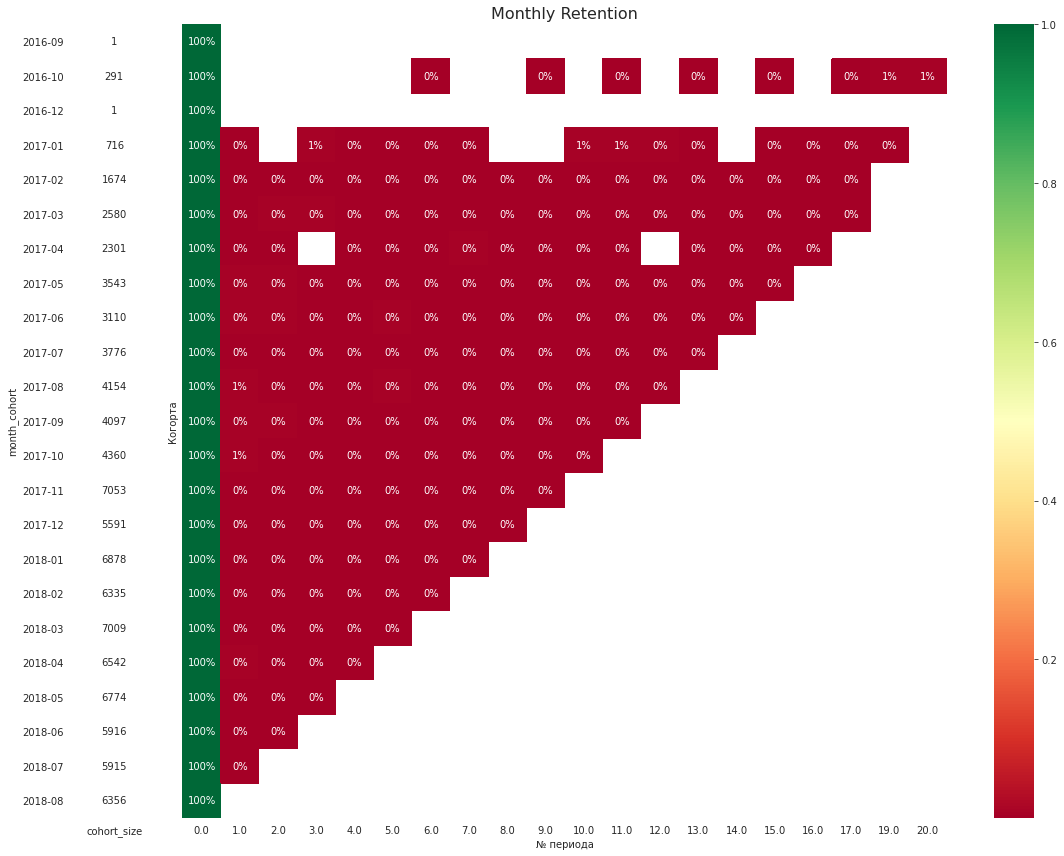

In [32]:
# Строим тепловую карту когортного анализа
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(16, 12), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    # Тепловая карта для коэффициентов удержания
    sns.heatmap(retention,
                mask=retention.isnull(),
                annot=True,
                fmt='.0%',
                cmap='RdYlGn',
                ax=ax[1])
    ax[1].set_title('Monthly Retention', fontsize=16)
    ax[1].set(xlabel='№ периода', ylabel='Когорта')

    # Тепловая карта для размеров когорт
    cohort_size_df = pd.DataFrame(cohort_sizes).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                ax=ax[0])

    fig.tight_layout()
    plt.show()

### Медианный retention первого месяца (она же конверсия в повторный заказ)

In [23]:
retention.iloc[:, 1].median()

0.0035496957403651115

### Когорта с самым высоким retention на 3 месяц

In [24]:
third_month_retention = retention.iloc[:, 3]
third_month_retention_max = third_month_retention.max()
cohort_index = np.where(third_month_retention == third_month_retention_max)
print(cohort_index)

(array([3]),)


### Таким образом, строка номер 3, соответствующая когорте "2017-01", имеет максимальный retention на 3 месяц

# Задача 2. Определить, существует ли product/market fit у маркетплейса.

### Исходя из таблицы когортного анализа можно оценить наличие product/market fit у данного продукта.

Retention показывает, есть ли PMF. 
Для PMF retention должен достичь уровня плато, что показывает, что доля аудитории, которая остается с продуктом, стабилизируется, а не утекает.

In [26]:
retention_percentage = retention.multiply(100, axis=0)
retention_percentage

period_in_months,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0
month_cohort,,,,,,,,,,,,,,,,,,,,
2016-09,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,100.0,NaN,NaN,NaN,NaN,NaN,0.343643,NaN,NaN,0.343643,NaN,0.343643,NaN,0.343643,NaN,0.343643,NaN,0.343643,0.687285,0.687285
2016-12,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,100.0,0.279330,NaN,0.558659,0.139665,0.139665,0.279330,0.279330,NaN,NaN,0.558659,0.558659,0.418994,0.279330,NaN,0.279330,0.279330,0.279330,0.139665,NaN
2017-02,100.0,0.179211,0.179211,0.358423,0.238949,0.119474,0.238949,0.059737,0.059737,0.238949,0.059737,0.358423,0.059737,0.179211,0.119474,0.059737,0.119474,0.238949,NaN,NaN
2017-03,100.0,0.271318,0.465116,0.426357,0.116279,0.077519,0.310078,0.193798,0.310078,0.193798,0.232558,0.155039,0.193798,0.116279,0.232558,0.116279,0.116279,0.116279,NaN,NaN
2017-04,100.0,0.347675,0.260756,NaN,0.304216,0.347675,0.260756,0.434594,0.260756,0.173837,0.086919,0.173837,NaN,0.086919,0.086919,0.086919,0.086919,NaN,NaN,NaN
2017-05,100.0,0.451595,0.423370,0.366921,0.366921,0.338696,0.338696,0.112899,0.310471,0.254022,0.225797,0.282247,0.197573,0.112899,0.225797,0.141123,NaN,NaN,NaN,NaN
2017-06,100.0,0.418006,0.450161,0.321543,0.160772,0.482315,0.257235,0.192926,0.128617,0.321543,0.289389,0.257235,0.064309,0.257235,0.096463,NaN,NaN,NaN,NaN,NaN


Для анализа выберем несколько самых длинных когорт и посмотрим на форму кривой retention:

Text(0.5, 1.0, 'Кривая удержания по когортам')

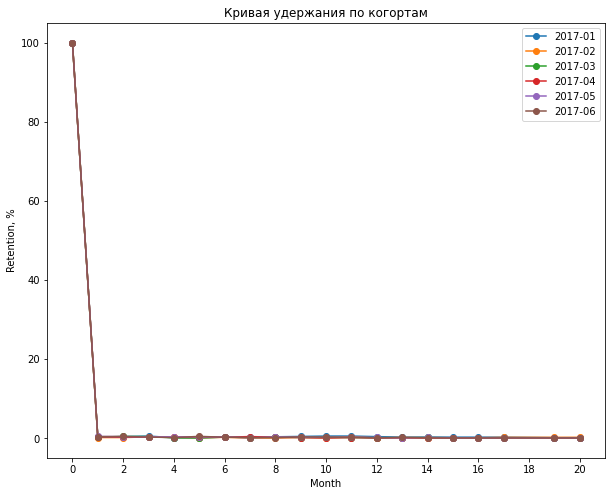

In [27]:
# Построение кривой удержания по нескольким самым длинным когортам, по которым есть данные
plt.figure(figsize=(10, 8))
x = retention_percentage.columns[:] # номера месяцев
cohort_indexes = retention_percentage.index[:] # названия когорт
for i in range(3, 9):
    y = retention_percentage.iloc[i, :] # данные когорты
    y_interpol = y.interpolate(method='linear') # интерполяция
    plt.plot(x, y_interpol, 'o-', label = cohort_indexes[i])
plt.legend()
plt.xlabel('Month')
plt.ylabel('Retention, %')
plt.xticks(np.arange(0, 22, step=2))
plt.title('Кривая удержания по когортам')

По графикам нескольких когорт видно, что их тренд одинаков - после 0 месяца клиенты сильно оттекают и retention находится около нуля (составляет доли процента).

Исключим 0 месяц (100% retention) из рассмотрения, чтобы более детально посмотреть, что происходит в следующие месяцы:

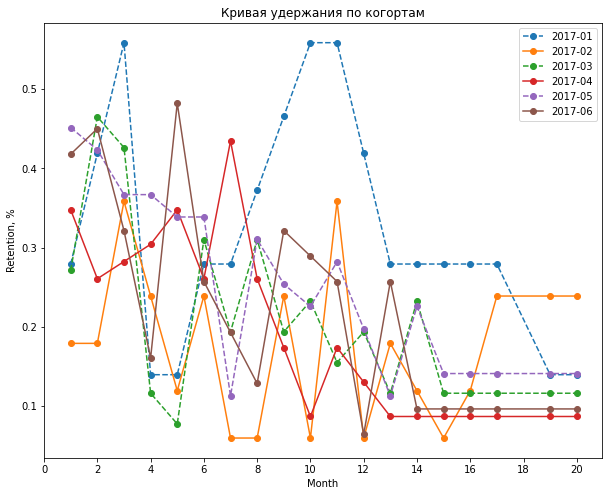

In [28]:
# Построение кривой удержания по нескольким самым длинным когортам, по которым есть данные
# Без 0 месяца
plt.figure(figsize=(10, 8))
x = retention_percentage.columns[1:] # номера месяцев
cohort_indexes = retention_percentage.index[:] # названия когорт
for i in range(3, 9):
    y = retention_percentage.iloc[i, 1:] # данные когорты
    y_interpol = y.interpolate(method='linear') # интерполяция
    if i % 2 == 0:
        plt.plot(x, y_interpol, 'o-', label = cohort_indexes[i])
    else:
        plt.plot(x, y_interpol, 'o--', label = cohort_indexes[i])
plt.legend()
plt.xlabel('Month')
plt.ylabel('Retention, %')
plt.title('Кривая удержания по когортам')
plt.xticks(np.arange(0, 22, step=2))
plt.show()

По графикам видно, что в большинсте когорт значения retention колеблются, однако общий тренд идет на снижение, и к 20 месяцу retenion в 5 из 6 когорт фиксируется на очень низком уровне, не превышающем 0.2 %. Несмотря на то, что retention имеет форму "выход на плато" по всем когортам, значение данной метрики очень низкое, начиная с 1 месяца и заканчивая 20 месяцем.

Положительный момент заключается в том, что каждый месяц в продукт приходит значительное количество новых клиентов, с медианным значением в 4057 клиентов. Этот стабильный поток новых пользователей указывает на то, что маркетплейс способен привлекать интересующихся клиентов, которые готовы совершать покупки. Однако важно отметить, что наличие стабильного потока новых клиентов не всегда гарантирует долгосрочный успех бизнеса.

Несмотря на привлекательность для новых пользователей, когортный анализ показывает, что лишь 0.3% клиентов (по медиане) остаются активными на первый месяц после первой покупки, а на второй месяц этот показатель значительно снижается до нуля. Это говорит о том, что большинство новых пользователей не находят достаточной ценности в продукте или услуге, чтобы продолжать использовать его. Высокий уровень оттока на ранних этапах взаимодействия с продуктом указывает на потенциальные проблемы с его качеством, функциональностью или соответствием ожиданиям клиентов.

### Все это говорит об отсутствии PMF.
### Причинами отсутствия PMF у маркетплейса могут быть:
1. Хорошее предложение на первый заказ, засчет чего привлекается много клиентов в 0 месяц, но невыгодное предложение на последующие заказы.
2. Трудности в оформлении заказов - технические проблемы (баги) на сайте.
3. Негативный пользовательский опыт после 1 заказа.
4. Более выгодное/привлекательное предложение у конкурентов.

# Задача 3. Метрики

### В первую очередь необходимо определить 5 основных метрик, на которых продакт может сконцентрироваться, чтобы максимизировать прибыль компании:

- Первая метрика должна отражать рост объёма продаж маркетплейса.
- Вторая — показывать объем аудитории, которой продукт доставляет ценность.
- Третья — отражать заинтересованность новых клиентов в продукте.
- Четвёртая — отражать вовлеченность клиента в продолжение использования продукта.
- Пятая — отражать денежное выражение вовлеченности клиента.

### 1. Revenue - доход с оформленных заказов за период

In [36]:
# Найдем стоимости заказов
order_prcices = order_items.groupby('order_id', as_index=False) \
            .agg({'price': 'sum'})
order_prcices.head()

,order_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,58.90
1,00018f77f2f0320c557190d7a144bdd3,239.90
2,000229ec398224ef6ca0657da4fc703e,199.00
3,00024acbcdf0a6daa1e931b038114c75,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90


In [37]:
orders_with_prices = orders_.merge(order_prcices, on='order_id', how='left')
orders_with_prices.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,price
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,19.90


In [38]:
orders_with_prices['order_approved_at'] = pd.to_datetime(orders_with_prices['order_approved_at'])

In [39]:
# Найдем месяц, в которой был оформлен заказ
orders_with_prices['order_month'] = orders_with_prices['order_approved_at'].dt.strftime('%Y-%m')

In [40]:
# Оставим только оформленные заказы
orders_with_prices_approved_orders_only = orders_with_prices.query('order_status != "unavailable" & order_status != "canceled" & order_status != "created"')

In [41]:
# Найдем общую стоимость всех оформленных заказов по месяцам
revenue = orders_with_prices_approved_orders_only.groupby('order_month', as_index=False) \
        .agg({'price': 'sum'}) \
        .rename(columns={'price': 'revenue'})
revenue.head()

,order_month,revenue
0,2016-09,134.97
1,2016-10,44580.19
2,2016-12,10.90
3,2017-01,114646.11
4,2017-02,245097.41


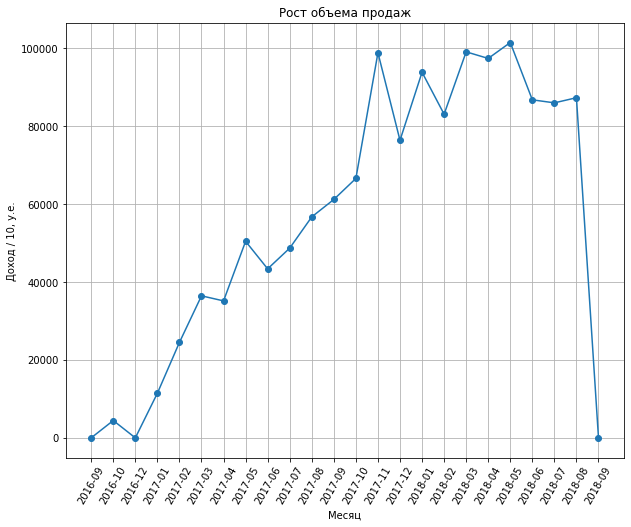

In [35]:
plt.figure(figsize=(10, 8))
plt.plot(revenue['order_month'], revenue['revenue']/10, 'o-')
plt.xlabel('Месяц')
plt.ylabel('Доход / 10, у.е.')
plt.title('Рост объема продаж')
plt.xticks(rotation=60)
plt.grid()
plt.show()

### 2. Кол-во клиентов, оформивших заказ, за период (платящие клиенты)

In [42]:
customer_volume = orders_with_prices_approved_orders_only.groupby('order_month', as_index=False) \
            .agg({'customer_unique_id': 'nunique'}) \
            .rename(columns={'customer_unique_id': 'customers'})
customer_volume.head()

,order_month,customers
0,2016-09,1
1,2016-10,291
2,2016-12,1
3,2017-01,717
4,2017-02,1678


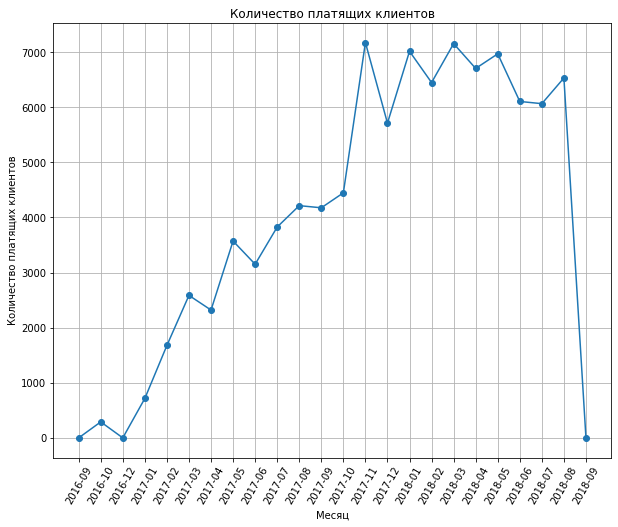

In [43]:
plt.figure(figsize=(10, 8))
plt.plot(customer_volume['order_month'], customer_volume['customers'], 'o-')
plt.xlabel('Месяц')
plt.ylabel('Количество платящих клиентов')
plt.title('Количество платящих клиентов')
plt.xticks(rotation=60)
plt.grid()
plt.show()

### 3. Конверсия из захода на сайт в оформление первого заказа

Эта метрика измеряет процент новых пользователей, которые совершают покупку после первого визита на сайт или в приложение. Она отражает, насколько эффективно маркетплейс привлекает и конвертирует новых клиентов.

Для расчета конверсии не хватает данных о визитах пользователей на сайт. Эти данные необходимо запросить

### 4. Retention - доля клиентов, которые продолжают использовать продукт после первого месяца

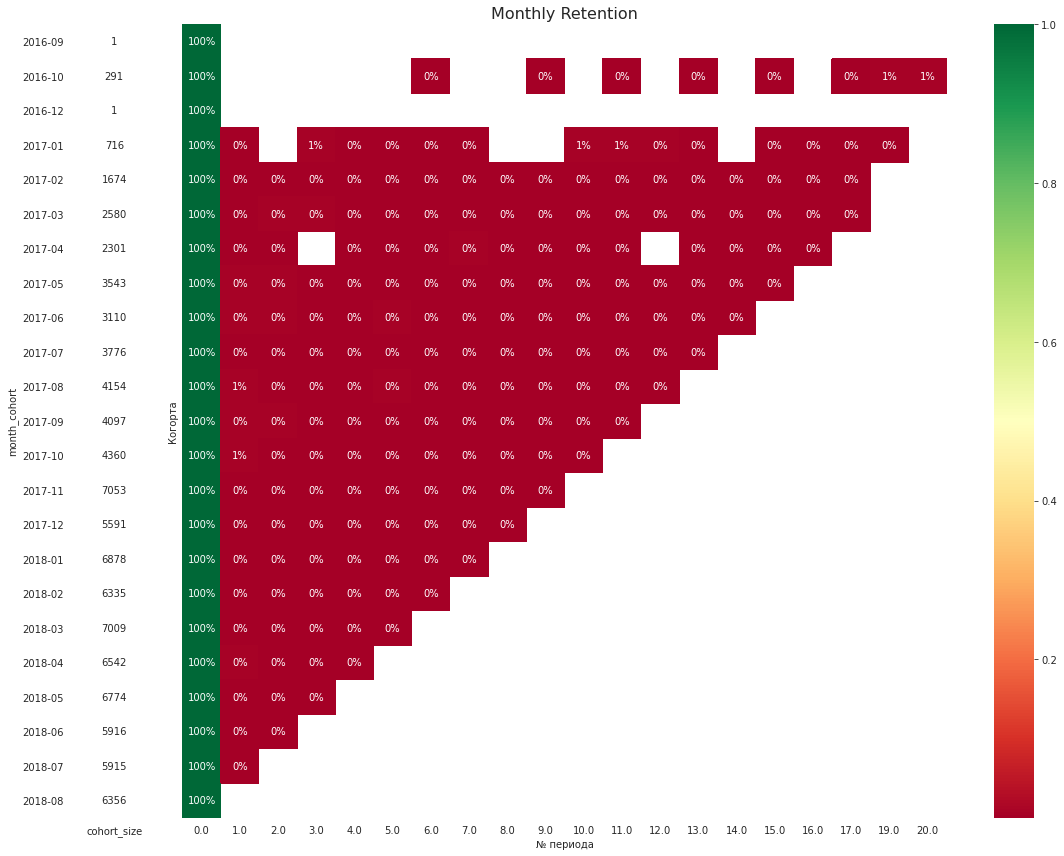

In [44]:
# Retention был посчитан ранее, в задании 2
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(16, 12), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    # Тепловая карта для коэффициентов удержания
    sns.heatmap(retention,
                mask=retention.isnull(),
                annot=True,
                fmt='.0%',
                cmap='RdYlGn',
                ax=ax[1])
    ax[1].set_title('Monthly Retention', fontsize=16)
    ax[1].set(xlabel='№ периода', ylabel='Когорта')

    # Тепловая карта для размеров когорт
    cohort_size_df = pd.DataFrame(cohort_sizes).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                ax=ax[0])

    fig.tight_layout()
    plt.show()

### 5. ARPPU  = Total revenue / Paying Users (за период) - Средняя сумма заказов на платящего пользователя

In [48]:
paying_customers = orders_with_prices_approved_orders_only[orders_with_prices_approved_orders_only.price.notna()]

In [50]:
arppu = paying_customers.groupby('order_month', as_index=False) \
        .agg({'customer_unique_id': 'nunique', 'price': 'sum'}) \
        .rename(columns={'customer_unique_id': 'customers', 'price': 'order_prices'})
arppu.head()

,order_month,customers,order_prices
0,2016-09,1,134.97
1,2016-10,288,44580.19
2,2016-12,1,10.90
3,2017-01,717,114646.11
4,2017-02,1678,245097.41


In [51]:
arppu['ARPPU'] = arppu['order_prices'] / arppu['customers']
arppu

,order_month,customers,order_prices,ARPPU
0,2016-09,1,134.97,134.970000
1,2016-10,288,44580.19,154.792326
2,2016-12,1,10.90,10.900000
3,2017-01,717,114646.11,159.896946
4,2017-02,1678,245097.41,146.065203
5,2017-03,2586,364608.58,140.993264
6,2017-04,2320,351581.17,151.543608
7,2017-05,3572,504527.15,141.245003
8,2017-06,3151,433858.69,137.689207
9,2017-07,3826,487021.88,127.292703


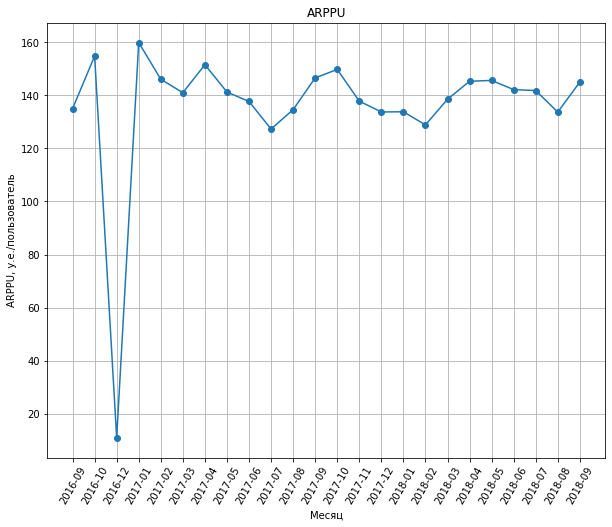

In [54]:
plt.figure(figsize=(10, 8))
plt.plot(arppu['order_month'], arppu['ARPPU'], 'o-')
plt.xlabel('Месяц')
plt.ylabel('ARPPU, у.е./пользователь')
plt.title('ARPPU')
plt.xticks(rotation=60)
plt.grid()
plt.show()

# Задача 4. Сформулировать гипотезы и рассчитать их вклад с помощью фреймворка ICE

In [56]:
# Данные с июня 2017 года
# Все заказы
orders_after_june_2017 = orders_.loc[orders_['order_approved_at'] >= pd.to_datetime("2017-06-01")]
# Только оформленные заказы
orders_placed_after_june_2017 = orders_with_first_orders \
        .loc[orders_with_first_orders['order_approved_at'] >= pd.to_datetime("2017-06-01")]

In [57]:
total_users = orders_after_june_2017.customer_unique_id
print(f'Всего клиентов: {total_users.nunique()}')

paying_users = orders_placed_after_june_2017.customer_unique_id
print(f'Клиенты, которые совершают заказы: {paying_users.nunique()}')

Всего клиентов: 85005
Клиенты, которые совершают заказы: 84200


In [58]:
# Конверсия в повторный заказ = медианный retention 1 месяца
cr_second_order = retention.iloc[:, 1].median()
print(f'Конверсия в повторный заказ: {cr_second_order}')

Конверсия в повторный заказ: 0.0035496957403651115


In [59]:
def scale_impact(x):
    if x >= 0 and x <= 50:
        return 1
    elif x > 50 and x <= 150:
        return 2
    elif x > 150 and x <= 350:
        return 3
    elif x > 350 and x <= 750:
        return 4
    elif x > 750 and x <= 1550:
        return 5
    elif x > 1550 and x <= 3150:
        return 6
    elif x > 3150 and x <= 6350:
        return 7
    elif x > 6350 and x <= 12750:
        return 8
    elif x > 12750 and x <= 25550:
        return 9
    elif x > 25550 and x <= 51150:
        return 10

### Гипотеза 1: Если исправим баг в системе процессинга заказов, то клиентам не придётся сталкиваться с проблемой отмены заказа, вследствие чего количество доставленных заказов увеличится. Считаем, что мы таким образом избавимся от всех отмен.

In [97]:
# Посчитаем отмененные заказы (= кол-во пользователей, кот отменяли заказы)
count_canceled = orders_after_june_2017.query('order_status == "canceled" | order_status == "unavailable"')['order_id'].nunique()
print(f'Количество отмененных заказов: {count_canceled}')

Количество отмененных заказов: 859


Impact гипотезы 1: Ожидается, что будет на 859 заказа больше

In [104]:
impact_1 = count_canceled
print(f"Impact гипотезы 1: {impact_1} заказов")
i_1 = scale_impact(impact_1)
c_1 = 8
e_1 = 6
ice_1 = i_1 * c_1 * e_1
print(f'ICE гипотезы 1: {ice_1}')

Impact гипотезы 1: 859 заказов
ICE гипотезы 1: 240


### Гипотеза 2. Если сократим время до отгрузки заказа, то клиенты перестанут получать свой заказ с запаздыванием, вследствие чего количество заказов увеличится за счёт повторных заказов. 

In [61]:
# Клиенты, которые получали заказы с запаздыванием в 0 месяц
users_whose_delivery_was_delayed = orders_placed_after_june_2017.query('period_in_months == 0') \
        .loc[orders_placed_after_june_2017['order_delivered_customer_date'] > orders_placed_after_june_2017['order_estimated_delivery_date']] \
        .customer_unique_id
print(f'Клиенты, которым заказ пришел с опозданием: {users_whose_delivery_was_delayed.nunique()}')

Клиенты, которым заказ пришел с опозданием: 7139


### Impact гипотезы 2: 7139 * конверсия в повторный заказ = кол-во повторных заказов

In [103]:
impact_2 = 7139 * cr_second_order
print(f"Impact гипотезы 2: {round(impact_2)} повторных заказов")
i_2 = scale_impact(impact_2)
c_2 = 10
e_2 = 4
ice_2 = i_2 * c_2 * e_2
print(f'ICE гипотезы 2: {ice_2}')

Impact гипотезы 2: 25 повторных заказов
ICE гипотезы 2: 40


### Гипотеза 3. Если создадим новый способ оплаты, который будет конвертировать клиентов в повторный заказ, то клиенты не будут испытывать трудности при оформлении заказа, вследствие чего количество заказов увеличится за счёт повторных заказов.

In [79]:
orders_after_june_2017_successful = orders_after_june_2017.query('order_status == "delivered"')

In [80]:
# Посчитаем кол-во заказов, которое сделал каждый клиент
customer_order_counts = orders_after_june_2017_successful.groupby('customer_unique_id').order_id.nunique().reset_index()

In [83]:
# Определяем количество клиентов, которые сделали только один заказ
single_order_customers_count = (customer_order_counts == 1).order_id.sum()
single_order_customers_count

80607

In [82]:
customer_order_counts.groupby('order_id').nunique('customer_unique_id')

,customer_unique_id
order_id,
1,80607
2,2138
3,129
4,23
5,9
6,2
7,3
9,1
15,1


### Impact гипотезы 3: 80607 * конверсия в повторный заказ = кол-во повторных заказов

In [102]:
impact_3 = 80607 * cr_second_order
print(f"Impact гипотезы 3: {round(impact_3)} повторных заказов")
i_3 = scale_impact(impact_3) 
c_3 = 5
e_3 = 9
ice_3 = i_3 * c_3 * e_3
print(f'ICE гипотезы 3: {ice_3}')

Impact гипотезы 3: 286 повторных заказов
ICE гипотезы 3: 135


### Вывод: гипотеза номер 1 об исправлении бага имеет наивысший приоритет по ICE

# Задача 5. Метрики, на которые повлияет гипотеза

Гипотеза 1. Если исправим баг в системе процессинга заказов, то клиентам не придётся сталкиваться с проблемой отмены заказа, вследствие чего количество доставленных заказов увеличится. Считаем, что мы таким образом избавимся от всех отмен.

Для проверки гипотезы о том, что исправление бага в системе процессинга заказов приведет к снижению количества отмен и увеличению количества доставленных заказов, важно определить метрики, которые будут отражать эффективность изменений. Метрики можно разделить на три категории: целевые, прокси и guardrail.

**Целевые метрики**

1. Количество доставленных заказов

    Определение: Общее количество заказов, которые были успешно доставлены клиентам.
    Цель: Оценить, увеличилось ли количество успешных доставок после исправления бага. Это основная метрика, которая непосредственно отражает успех гипотезы.

**Прокси метрики**

2. Конверсия в доставку товара до покупателя

    Определение: Общее количество заказов, которые были доставлены клиентам / Общее количество заказов.
    Цель: Измерить снижение числа отмен после исправления бага. Эта метрика служит индикатором того, насколько эффективно работает система после внесения изменений.

**Guardrail метрики**

3. Конверсия в оформление заказа

    Определение: Доля клиентов, которые оформили заказ, деленная на количество активной аудитории
    Цель: Убедиться, что исправление бага не негативно сказалось на общем восприятии клиента совершить следующий заказ.


# Задача 6. Выводы и рекомендации по продукту

Маркетплейс столкнулся с проблемой - выручка маркетплейса не растет на протяжении около двух лет. 

По результатам когортного анализа наблюдается привлечение большого числа клиентов каждый месяц в продукт, однако также наблюдается крайне низкий уровень удержания клиентов в продукте - повторный заказ совершают всего 0,35 % покупателей. Это говорит о том, что клиенты не находят ценность в продукте.

Для улучшения метрик продукта рекомендуется первым делом исправить баг, что позволит снизить количество отмен заказов и удержать клиентов в продукте.